In [1]:
# For getting data ready
import pandas as pd
import numpy as np

# For visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Harpreet.Singh\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
daily_data = pd.read_csv('city_day.csv')
hourly_data = pd.read_csv('city_hour.csv')



In [3]:
daily_data

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [4]:
daily_data['Date'] = pd.to_datetime(daily_data['Date'])

weekday_dict = {
    0:'Monday',
    1:'Tuesday',
    2:'Wednesday',
    3:'Thursday',
    4:'Friday',
    5:'Saturday',
    6:'Sunday'
}

month_dict = {
    1:'Jan',
    2:'Feb',
    3:'Mar',
    4:'Apr',
    5:'May',
    6:'Jun',
    7:'Jul',
    8:'Aug',
    9:'Sep',
    10:'Oct',
    11:'Nov',
    12:'Dec'
}

daily_data['Year'] = daily_data['Date'].dt.year
daily_data['Month'] = daily_data['Date'].dt.month_name()
daily_data['Day'] = daily_data['Date'].dt.weekday.replace(weekday_dict)


In [5]:
daily_data

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Year,Month,Day
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN,2015,January,Thursday
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN,2015,January,Friday
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN,2015,January,Saturday
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN,2015,January,Sunday
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN,2015,January,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good,2020,June,Saturday
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory,2020,June,Sunday
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory,2020,June,Monday
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory,2020,June,Tuesday


In [6]:
daily_data.shape

(29531, 19)

In [7]:
daily_data.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket', 'Year',
       'Month', 'Day'],
      dtype='object')

In [8]:
daily_data.dtypes

City                  object
Date          datetime64[ns]
PM2.5                float64
PM10                 float64
NO                   float64
NO2                  float64
NOx                  float64
NH3                  float64
CO                   float64
SO2                  float64
O3                   float64
Benzene              float64
Toluene              float64
Xylene               float64
AQI                  float64
AQI_Bucket            object
Year                   int64
Month                 object
Day                   object
dtype: object

In [9]:
daily_data['City'].unique()

array(['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru',
       'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore',
       'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad',
       'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai',
       'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram',
       'Visakhapatnam'], dtype=object)

In [10]:
daily_data.isna().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
Year              0
Month             0
Day               0
dtype: int64

In [11]:
daily_data['AQI_Bucket'].unique()

array([nan, 'Poor', 'Very Poor', 'Severe', 'Moderate', 'Satisfactory',
       'Good'], dtype=object)

In [12]:
daily_data.sample(25)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Year,Month,Day
19458,Kolkata,2019-06-10,34.28,62.72,5.70,12.48,15.42,4.09,0.39,1.65,36.48,1.85,7.33,NaN,80.0,Satisfactory,2019,June,Monday
25552,Patna,2020-01-14,154.59,174.78,69.89,25.34,94.37,14.62,4.16,12.28,9.91,3.42,1.25,4.85,343.0,Very Poor,2020,January,Tuesday
22261,Mumbai,2016-02-11,NaN,NaN,NaN,NaN,11.11,NaN,0.00,NaN,NaN,0.00,0.00,0.00,NaN,NaN,2016,February,Thursday
23467,Mumbai,2019-06-01,12.38,45.97,32.60,14.13,46.54,NaN,1.58,16.05,24.38,0.23,NaN,NaN,81.0,Satisfactory,2019,June,Saturday
10515,Delhi,2015-10-14,75.81,155.25,14.33,43.47,53.25,28.75,1.61,10.89,67.89,3.12,11.08,1.99,204.0,Poor,2015,October,Wednesday
22305,Mumbai,2016-03-26,NaN,NaN,NaN,NaN,17.12,NaN,0.00,NaN,NaN,0.00,0.00,0.00,NaN,NaN,2016,March,Saturday
4410,Bengaluru,2015-04-27,24.62,NaN,3.77,7.74,11.71,13.92,1.26,18.89,65.38,NaN,1.36,NaN,156.0,Moderate,2015,April,Monday
1562,Ahmedabad,2019-04-12,75.74,NaN,21.38,67.43,48.85,NaN,21.38,8.99,17.56,4.20,32.50,7.11,944.0,Severe,2019,April,Friday
950,Ahmedabad,2017-08-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,August,Tuesday
3950,Amritsar,2019-07-24,43.72,69.77,7.82,9.53,17.10,10.20,0.38,15.18,27.31,4.18,1.14,13.14,79.0,Satisfactory,2019,July,Wednesday


In [14]:
daily_data[daily_data['AQI']==daily_data['AQI'].max()]

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Year,Month,Day
1145,Ahmedabad,2018-02-19,242.66,NaN,132.47,199.17,246.03,NaN,132.47,NaN,44.06,0.74,5.81,3.21,2049.0,Severe,2018,February,Monday


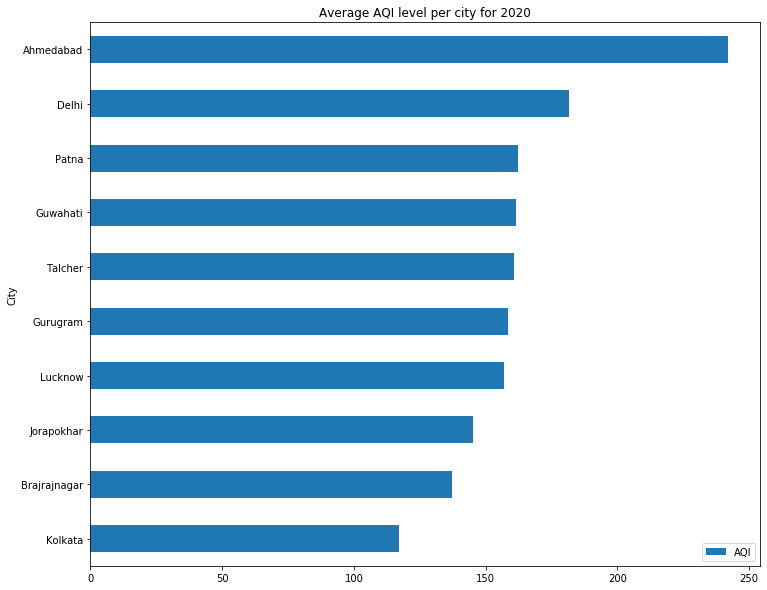

In [15]:
AQI_data = daily_data[daily_data['AQI'].notna()]
AQI_data = AQI_data[['Year','City','AQI']]
AQI_data = AQI_data[AQI_data['Year']==2020]
AQI_data = AQI_data.groupby('City')['AQI'].mean().sort_values().tail(10)

plt.figure(figsize=(12,10))
ax=AQI_data.plot(kind='barh')
plt.legend()
plt.title('Average AQI level per city for 2020')
plt.show()

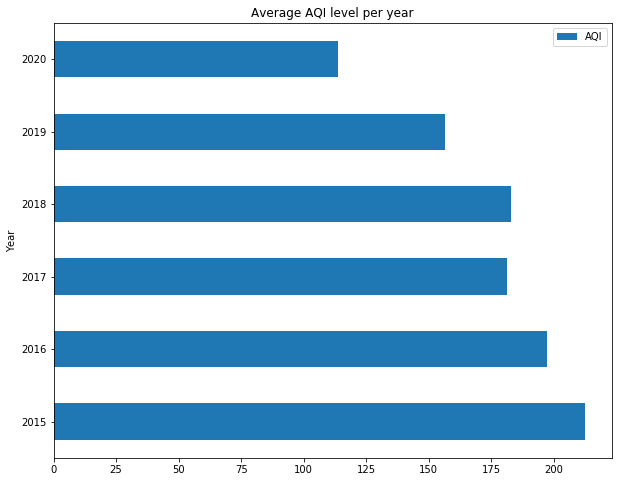

In [16]:
AQI_data = daily_data[daily_data['AQI'].notna()]
AQI_data = AQI_data[['Date','Year','City','AQI']]

AQI_data = AQI_data.groupby('Year')['AQI'].mean()

plt.figure(figsize=(10,8))
ax=AQI_data.plot(kind='barh')
plt.legend()
plt.title('Average AQI level per year')
plt.show()

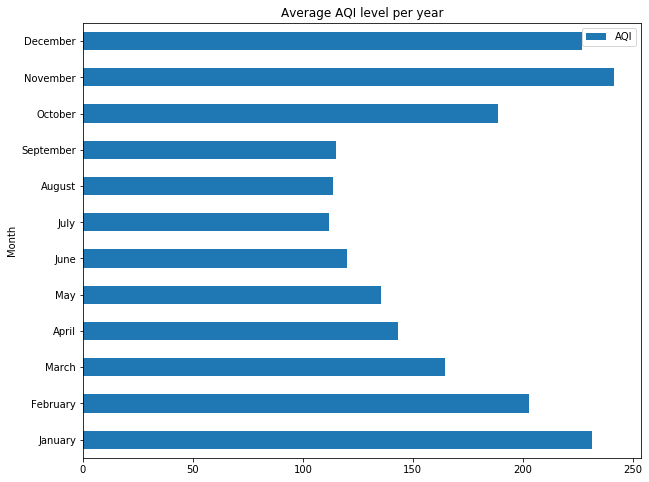

In [17]:
AQI_data = daily_data[daily_data['AQI'].notna()]
AQI_data = AQI_data[['Date','Month','City','AQI']]

AQI_data = AQI_data.groupby('Month',sort=False)['AQI'].mean()

plt.figure(figsize=(10,8))
ax=AQI_data.plot(kind='barh')
plt.legend()
plt.title('Average AQI level per year')
plt.show()

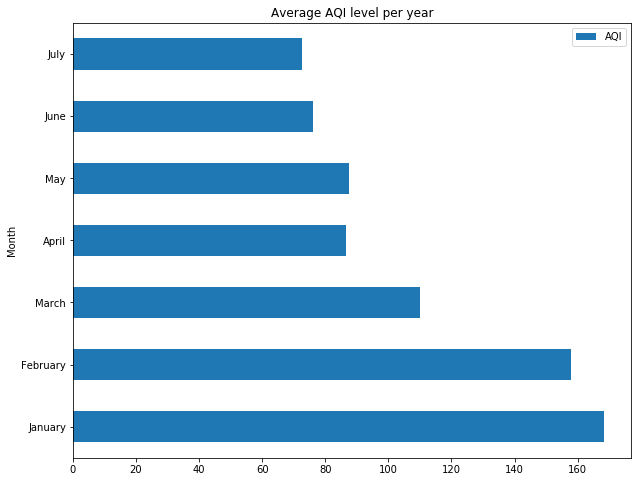

In [18]:
AQI_data = daily_data[daily_data['AQI'].notna() & (daily_data['Year']==2020)]
AQI_data = AQI_data[['Date','Month','City','AQI']]

AQI_data = AQI_data.groupby('Month',sort=False)['AQI'].mean()

plt.figure(figsize=(10,8))
ax=AQI_data.plot(kind='barh')
plt.legend()
plt.title('Average AQI level per year')
plt.show()

<Figure size 720x576 with 0 Axes>

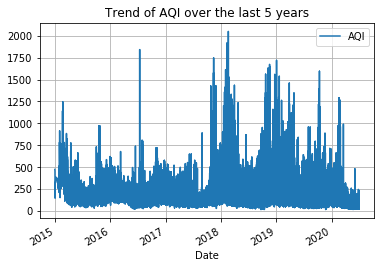

In [19]:
AQI_data = daily_data[daily_data['AQI'].notna()]
AQI_data = AQI_data[['Date','AQI']]
AQI_data_daily = AQI_data.set_index("Date")

plt.figure(figsize=(10,8))
ax=AQI_data_daily.plot(grid=True)
plt.legend()
plt.title('Trend of AQI over the last 5 years')
plt.show()


Text(0.5, 1.0, 'Trend of AQI over 2020')

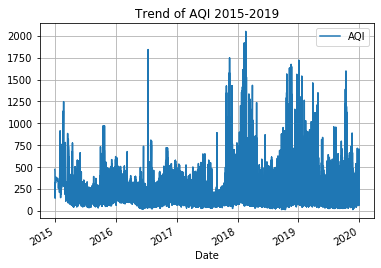

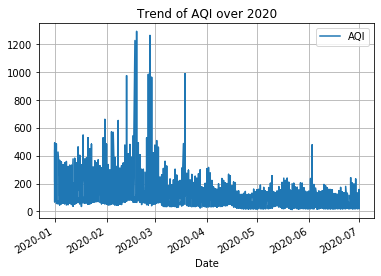

In [20]:
AQI_data_2015_2019 = daily_data[daily_data['AQI'].notna() & (daily_data['Year']!=2020) ]
AQI_data_2015_2019 = AQI_data_2015_2019[['Date','AQI']]
AQI_data_daily_2015_2019 = AQI_data_2015_2019.set_index("Date")


AQI_data_2020 = daily_data[daily_data['AQI'].notna() & (daily_data['Year']==2020) ]
AQI_data_2020 = AQI_data_2020[['Date','AQI']]

AQI_data_daily_2020 = AQI_data_2020.set_index("Date")

ax1=AQI_data_daily_2015_2019.plot(grid=True)
ax1.set_title('Trend of AQI 2015-2019')
ax2=AQI_data_daily_2020.plot(grid=True)
ax2.set_title('Trend of AQI over 2020')

In [59]:
pre_corona=daily_data[(daily_data['Date']>='2015-01-01') & (daily_data['Date']<='2020-03-20')]
print('Pre Corona avg AQI level:',pre_corona['AQI'].dropna().mean())
post_corona=daily_data[(daily_data['Date']>='2020-03-20')]
print('Post Corona avg AQI level:',post_corona['AQI'].dropna().mean())

Pre Corona avg AQI level: 175.6702199131097
Post Corona avg AQI level: 85.32508833922262


In [23]:
measurement = pd.read_csv('Measurement_item_info.csv')
measurement

,Item code,Item name,Unit of measurement,Good(Blue),Normal(Green),Bad(Yellow),Very bad(Red)
0,1,SO2,ppm,0.02,0.05,0.15,1.0
1,3,NO2,ppm,0.03,0.06,0.20,2.0
2,5,CO,ppm,2.00,9.00,15.00,50.0
3,6,O3,ppm,0.03,0.09,0.15,0.5
4,8,PM10,Mircrogram/m3,30.00,80.00,150.00,600.0
5,9,PM2.5,Mircrogram/m3,15.00,35.00,75.00,500.0


In [24]:
measurement['Item name(unit)'] = measurement['Item name'] + '(' + measurement['Unit of measurement'].str.lower() + ')'

In [25]:
measurement

,Item code,Item name,Unit of measurement,Good(Blue),Normal(Green),Bad(Yellow),Very bad(Red),Item name(unit)
0,1,SO2,ppm,0.02,0.05,0.15,1.0,SO2(ppm)
1,3,NO2,ppm,0.03,0.06,0.20,2.0,NO2(ppm)
2,5,CO,ppm,2.00,9.00,15.00,50.0,CO(ppm)
3,6,O3,ppm,0.03,0.09,0.15,0.5,O3(ppm)
4,8,PM10,Mircrogram/m3,30.00,80.00,150.00,600.0,PM10(mircrogram/m3)
5,9,PM2.5,Mircrogram/m3,15.00,35.00,75.00,500.0,PM2.5(mircrogram/m3)


In [26]:
item_dict = {row['Item code']: row['Item name(unit)'] for idx,row in measurement.iterrows() }

In [27]:
item_dict

{1: 'SO2(ppm)',
 3: 'NO2(ppm)',
 5: 'CO(ppm)',
 6: 'O3(ppm)',
 8: 'PM10(mircrogram/m3)',
 9: 'PM2.5(mircrogram/m3)'}

In [28]:
print('First Date', str(daily_data['Date'].min()))
print('Last Date', str(daily_data['Date'].max()))

First Date 2015-01-01 00:00:00
Last Date 2020-07-01 00:00:00


In [29]:
daily_data[daily_data['City']== 'Delhi' ]

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Year,Month,Day
10229,Delhi,2015-01-01,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,9.84,472.0,Severe,2015,January,Thursday
10230,Delhi,2015-01-02,186.18,269.55,62.09,32.87,88.14,31.83,9.54,6.65,29.97,10.55,20.09,4.29,454.0,Severe,2015,January,Friday
10231,Delhi,2015-01-03,87.18,131.90,25.73,30.31,47.95,69.55,10.61,2.65,19.71,3.91,10.23,1.99,143.0,Moderate,2015,January,Saturday
10232,Delhi,2015-01-04,151.84,241.84,25.01,36.91,48.62,130.36,11.54,4.63,25.36,4.26,9.71,3.34,319.0,Very Poor,2015,January,Sunday
10233,Delhi,2015-01-05,146.60,219.13,14.01,34.92,38.25,122.88,9.20,3.33,23.20,2.80,6.21,2.96,325.0,Very Poor,2015,January,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12233,Delhi,2020-06-27,39.80,155.94,10.88,21.46,22.47,31.43,0.87,10.38,18.88,1.69,19.99,0.43,112.0,Moderate,2020,June,Saturday
12234,Delhi,2020-06-28,59.52,308.65,12.67,21.60,23.86,29.27,0.94,10.70,18.05,1.71,25.13,1.74,196.0,Moderate,2020,June,Sunday
12235,Delhi,2020-06-29,44.86,184.12,10.50,21.57,21.94,27.97,0.88,11.58,26.61,2.13,23.80,1.13,233.0,Poor,2020,June,Monday
12236,Delhi,2020-06-30,39.80,91.98,5.99,17.96,15.44,28.48,0.84,10.51,37.29,1.57,16.37,0.49,114.0,Moderate,2020,June,Tuesday


In [30]:
daily_data.isna().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
Year              0
Month             0
Day               0
dtype: int64

In [31]:
pollutants = measurement['Item name'].tolist()
pollutants

['SO2', 'NO2', 'CO', 'O3', 'PM10', 'PM2.5']

In [32]:
daily_data_comp = daily_data[['City','Date','SO2', 'NO2', 'CO', 'O3', 'PM10', 'PM2.5','Year','Month','Day','AQI']]

In [33]:
daily_data_comp

,City,Date,SO2,NO2,CO,O3,PM10,PM2.5,Year,Month,Day,AQI
0,Ahmedabad,2015-01-01,27.64,18.22,0.92,133.36,NaN,NaN,2015,January,Thursday,NaN
1,Ahmedabad,2015-01-02,24.55,15.69,0.97,34.06,NaN,NaN,2015,January,Friday,NaN
2,Ahmedabad,2015-01-03,29.07,19.30,17.40,30.70,NaN,NaN,2015,January,Saturday,NaN
3,Ahmedabad,2015-01-04,18.59,18.48,1.70,36.08,NaN,NaN,2015,January,Sunday,NaN
4,Ahmedabad,2015-01-05,39.33,21.42,22.10,39.31,NaN,NaN,2015,January,Monday,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,8.55,25.06,0.47,23.30,50.94,15.02,2020,June,Saturday,41.0
29527,Visakhapatnam,2020-06-28,12.72,26.06,0.52,30.14,74.09,24.38,2020,June,Sunday,70.0
29528,Visakhapatnam,2020-06-29,8.42,29.53,0.48,30.96,65.73,22.91,2020,June,Monday,68.0
29529,Visakhapatnam,2020-06-30,9.84,29.26,0.52,28.30,49.97,16.64,2020,June,Tuesday,54.0


In [34]:
measurement

,Item code,Item name,Unit of measurement,Good(Blue),Normal(Green),Bad(Yellow),Very bad(Red),Item name(unit)
0,1,SO2,ppm,0.02,0.05,0.15,1.0,SO2(ppm)
1,3,NO2,ppm,0.03,0.06,0.20,2.0,NO2(ppm)
2,5,CO,ppm,2.00,9.00,15.00,50.0,CO(ppm)
3,6,O3,ppm,0.03,0.09,0.15,0.5,O3(ppm)
4,8,PM10,Mircrogram/m3,30.00,80.00,150.00,600.0,PM10(mircrogram/m3)
5,9,PM2.5,Mircrogram/m3,15.00,35.00,75.00,500.0,PM2.5(mircrogram/m3)


In [35]:
def evaluation_generator(good, normal, bad, vbad):
    def measurement_evaluator(value):
        if(pd.isnull(value) or value < 0):
            return np.nan
        elif(value <= good):
            return 'Good'
        elif(value <= normal):
            return 'Normal'
        elif(value <= bad):
            return 'Bad'
        else:
            return 'Very bad'
        
    return measurement_evaluator

In [36]:
evaluators = {
    row['Item name']: evaluation_generator(row['Good(Blue)'], row['Normal(Green)'], row['Bad(Yellow)'], row['Very bad(Red)']) 
    for idx, row in measurement.iterrows()}

In [37]:
evaluators

{'SO2': <function __main__.evaluation_generator.<locals>.measurement_evaluator(value)>,
 'NO2': <function __main__.evaluation_generator.<locals>.measurement_evaluator(value)>,
 'CO': <function __main__.evaluation_generator.<locals>.measurement_evaluator(value)>,
 'O3': <function __main__.evaluation_generator.<locals>.measurement_evaluator(value)>,
 'PM10': <function __main__.evaluation_generator.<locals>.measurement_evaluator(value)>,
 'PM2.5': <function __main__.evaluation_generator.<locals>.measurement_evaluator(value)>}

In [38]:
for pol, func in evaluators.items():
    daily_data_comp[pol.split()[0] + ' Level'] = daily_data_comp[pol].map(func)

C:\Users\Harpreet.Singh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [39]:
daily_data_comp.head()

,City,Date,SO2,NO2,CO,O3,PM10,PM2.5,Year,Month,Day,AQI,SO2 Level,NO2 Level,CO Level,O3 Level,PM10 Level,PM2.5 Level
0,Ahmedabad,2015-01-01,27.64,18.22,0.92,133.36,NaN,NaN,2015,January,Thursday,NaN,Very bad,Very bad,Good,Very bad,NaN,NaN
1,Ahmedabad,2015-01-02,24.55,15.69,0.97,34.06,NaN,NaN,2015,January,Friday,NaN,Very bad,Very bad,Good,Very bad,NaN,NaN
2,Ahmedabad,2015-01-03,29.07,19.30,17.40,30.70,NaN,NaN,2015,January,Saturday,NaN,Very bad,Very bad,Very bad,Very bad,NaN,NaN
3,Ahmedabad,2015-01-04,18.59,18.48,1.70,36.08,NaN,NaN,2015,January,Sunday,NaN,Very bad,Very bad,Good,Very bad,NaN,NaN
4,Ahmedabad,2015-01-05,39.33,21.42,22.10,39.31,NaN,NaN,2015,January,Monday,NaN,Very bad,Very bad,Very bad,Very bad,NaN,NaN


In [40]:
daily_data_comp.columns

Index(['City', 'Date', 'SO2', 'NO2', 'CO', 'O3', 'PM10', 'PM2.5', 'Year',
       'Month', 'Day', 'AQI', 'SO2 Level', 'NO2 Level', 'CO Level', 'O3 Level',
       'PM10 Level', 'PM2.5 Level'],
      dtype='object')

In [41]:
data_cleaned = daily_data_comp[['City', 'Date','Year','Month', 'Day','SO2', 'NO2', 'CO', 'O3', 'PM10', 'PM2.5', 'SO2 Level', 'NO2 Level', 'CO Level',
       'O3 Level', 'PM10 Level', 'PM2.5 Level','AQI']]

In [42]:
data_cleaned.sample(15)

,City,Date,Year,Month,Day,SO2,NO2,CO,O3,PM10,PM2.5,SO2 Level,NO2 Level,CO Level,O3 Level,PM10 Level,PM2.5 Level,AQI
9970,Coimbatore,2019-10-17,2019,October,Thursday,10.95,19.61,1.99,24.69,26.65,19.33,Very bad,Very bad,Good,Very bad,Good,Normal,106.0
14144,Guwahati,2019-04-22,2019,April,Monday,21.73,15.48,0.59,54.18,61.08,42.87,Very bad,Very bad,Good,Very bad,Normal,Bad,84.0
14312,Guwahati,2019-10-07,2019,October,Monday,14.83,11.94,0.68,17.91,53.93,30.21,Very bad,Very bad,Good,Very bad,Normal,Normal,82.0
15549,Hyderabad,2017-08-29,2017,August,Tuesday,4.40,9.26,0.12,35.24,11.40,6.57,Very bad,Very bad,Good,Very bad,Good,Good,56.0
10963,Delhi,2017-01-04,2017,January,Wednesday,23.11,91.07,1.55,41.13,341.15,248.01,Very bad,Very bad,Good,Very bad,Very bad,Very bad,439.0
12304,Ernakulam,2020-03-28,2020,March,Saturday,3.13,3.50,1.15,NaN,56.39,30.10,Very bad,Very bad,Good,NaN,Normal,Normal,63.0
15589,Hyderabad,2017-10-08,2017,October,Sunday,19.21,24.14,0.29,36.80,42.02,32.08,Very bad,Very bad,Good,Very bad,Normal,Normal,100.0
5029,Bengaluru,2017-01-05,2017,January,Thursday,4.57,36.01,0.63,35.78,114.62,36.09,Very bad,Very bad,Good,Very bad,Bad,Bad,85.0
20417,Lucknow,2016-07-25,2016,July,Monday,5.56,24.60,1.81,27.15,NaN,37.68,Very bad,Very bad,Good,Very bad,NaN,Bad,63.0
24093,Patna,2016-01-16,2016,January,Saturday,4.94,37.64,2.34,16.45,NaN,195.43,Very bad,Very bad,Normal,Very bad,NaN,Very bad,393.0


In [43]:
overview = data_cleaned.groupby('Date').mean().loc[:,'SO2':'PM2.5']

# Adding levels 
for pol, func in evaluators.items():
    overview[pol.split()[0] + ' Level'] = overview[pol].map(func)

In [44]:
overview.head()

,SO2,NO2,CO,O3,PM10,PM2.5,SO2 Level,NO2 Level,CO Level,O3 Level,PM10 Level,PM2.5 Level
Date,,,,,,,,,,,,
2015-01-01,43.840000,20.158000,4.961667,44.608000,607.98,313.22,Very bad,Very bad,Normal,Very bad,Very bad,Very bad
2015-01-02,42.648000,18.494000,4.515000,23.524000,269.55,186.18,Very bad,Very bad,Normal,Very bad,Very bad,Very bad
2015-01-03,52.666000,20.296000,9.826667,19.658000,131.90,87.18,Very bad,Very bad,Bad,Very bad,Bad,Very bad
2015-01-04,38.306667,20.475000,4.491429,23.536667,241.84,151.84,Very bad,Very bad,Normal,Very bad,Very bad,Very bad
2015-01-05,39.773333,19.461667,6.800000,22.745000,219.13,146.60,Very bad,Very bad,Normal,Very bad,Very bad,Very bad


In [45]:
correlations=overview.corr(method='spearman')

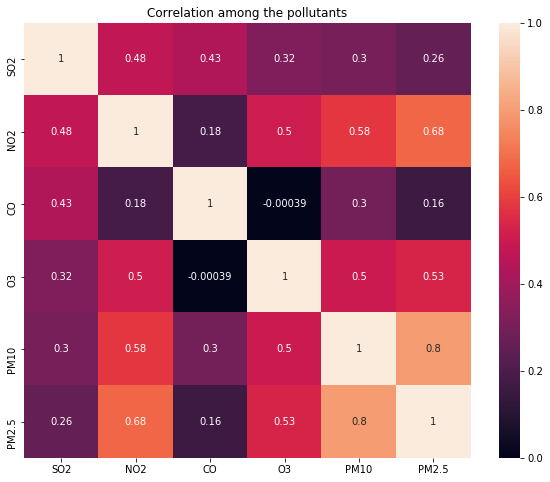

In [46]:
plt.figure(figsize=(10,8))

ax= sns.heatmap(data=correlations,annot=True,color=sns.color_palette("coolwarm", 7),)
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.title("Correlation among the pollutants")
plt.show() # ta-da!

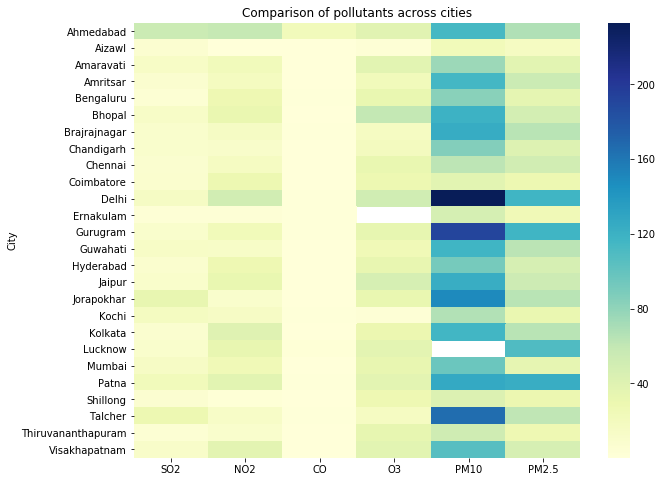

In [47]:
city_pol = data_cleaned.groupby('City').mean().loc[:,'SO2':'PM2.5']

plt.figure(figsize=(10,8))

ax= sns.heatmap(data=city_pol,cmap="YlGnBu",annot=False)
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.title("Comparison of pollutants across cities")
plt.show() # ta-da!

In [48]:
data_cleaned.columns

Index(['City', 'Date', 'Year', 'Month', 'Day', 'SO2', 'NO2', 'CO', 'O3',
       'PM10', 'PM2.5', 'SO2 Level', 'NO2 Level', 'CO Level', 'O3 Level',
       'PM10 Level', 'PM2.5 Level', 'AQI'],
      dtype='object')

In [60]:
top_10

['Ahmedabad',
 'Delhi',
 'Patna',
 'Gurugram',
 'Lucknow',
 'Talcher',
 'Jorapokhar',
 'Brajrajnagar',
 'Kolkata',
 'Guwahati']

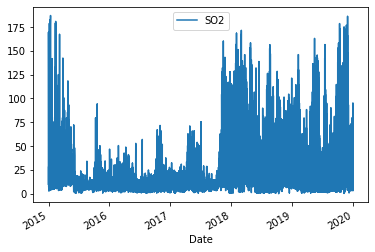

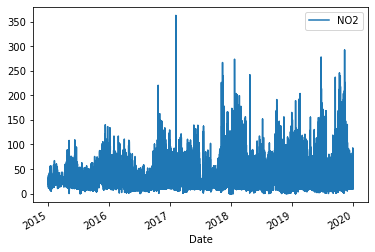

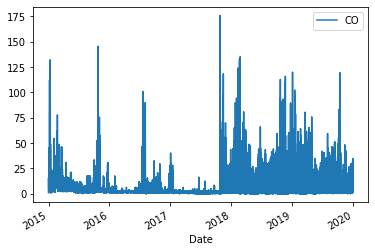

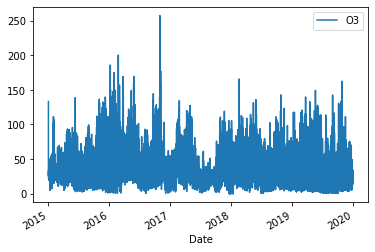

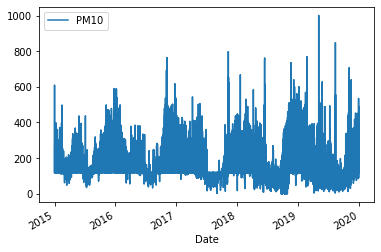

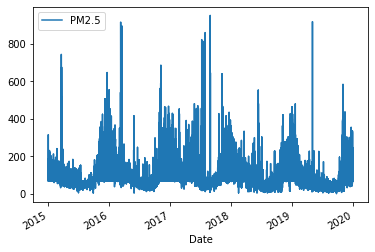

In [65]:
top_polluting_pre_corona = data_cleaned[data_cleaned['Year'] !=2020].pivot_table(values='AQI',index='City',aggfunc=np.mean,dropna=True).sort_values(by='AQI',ascending=False).head(10).reset_index()
top_10_pre_corona = top_polluting_pre_corona['City'].to_list()
top_10_data_pre_corona = data_cleaned[data_cleaned['City'].isin(top_10) & (data_cleaned['Year'] !=2020)].fillna(data_cleaned.mean())

for i in ['SO2', 'NO2', 'CO', 'O3', 'PM10', 'PM2.5']:
    top_10_data_pre_corona.plot(x='Date',y=i)

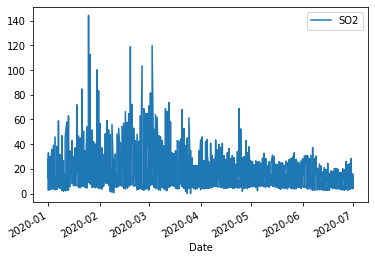

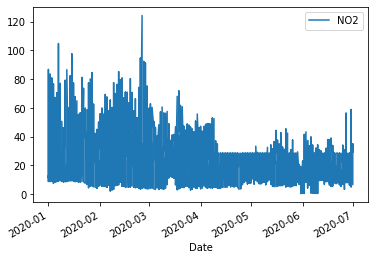

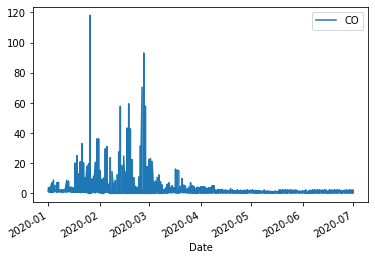

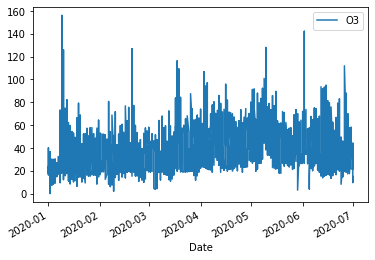

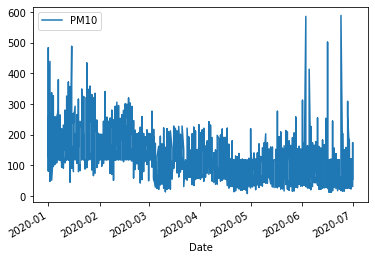

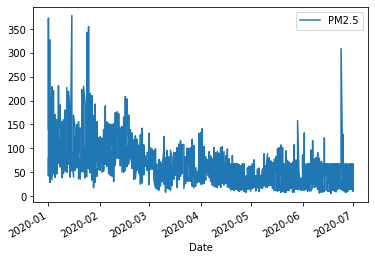

In [66]:
top_polluting_post_corona = data_cleaned[data_cleaned['Year'] ==2020].pivot_table(values='AQI',index='City',aggfunc=np.mean,dropna=True).sort_values(by='AQI',ascending=False).head(10).reset_index()
top_10_post_corona = top_polluting_post_corona['City'].to_list()
top_10_data_post_corona = data_cleaned[data_cleaned['City'].isin(top_10) & (data_cleaned['Year'] ==2020)].fillna(data_cleaned.mean())

for i in ['SO2', 'NO2', 'CO', 'O3', 'PM10', 'PM2.5']:
    top_10_data_post_corona.plot(x='Date',y=i)

In [67]:
top_10_pre_corona

['Ahmedabad',
 'Delhi',
 'Patna',
 'Gurugram',
 'Lucknow',
 'Talcher',
 'Jorapokhar',
 'Bhopal',
 'Brajrajnagar',
 'Kolkata']

In [68]:
top_10_post_corona

['Ahmedabad',
 'Delhi',
 'Patna',
 'Guwahati',
 'Talcher',
 'Gurugram',
 'Lucknow',
 'Jorapokhar',
 'Brajrajnagar',
 'Kolkata']

In [100]:
general = overview.describe().loc[['min', 'max', 'mean', 'std', '25%', '50%', '75%'],:].T
general['level'] = None
for idx, row in general.iterrows():
    general.loc[idx, 'level'] = evaluators[idx](row['mean'])
    
general.T

,SO2,NO2,CO,O3,PM10,PM2.5
min,3.76143,11.115,0.181,12.3589,34.16,19.2183
max,52.666,85.5575,23.2171,68.9233,607.98,313.22
mean,13.8488,28.8645,2.38071,34.865,137.355,76.5351
std,6.20644,9.54553,2.0223,8.88388,62.1491,42.4015
25%,9.365,21.8517,1.10375,28.75,88.0009,42.915
50%,12.9282,27.6492,1.89143,35.2579,131.227,66.0012
75%,17.0055,34.4443,2.98529,40.5524,173.554,101.099
level,Very bad,Very bad,Normal,Very bad,Bad,Very bad


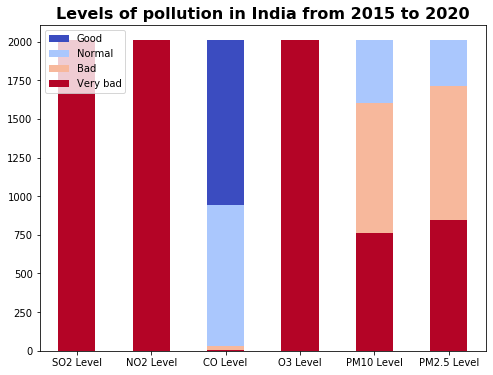

In [77]:
level_counts = pd.concat([overview[col].value_counts() for col in overview.loc[:, 'SO2 Level':]], axis=1, join='outer', sort=True).fillna(0.0)
level_counts = level_counts.loc[['Very bad', 'Bad', 'Normal', 'Good'], :]

level_counts.T.plot(kind='bar', stacked=True, figsize=(8,6), rot=0,
                    colormap='coolwarm_r', legend='reverse')
plt.title('Levels of pollution in India from 2015 to 2020', fontsize=16, fontweight='bold')
plt.show()

In [72]:
delhi_data = data_cleaned[data_cleaned['City']=='Delhi']
ahemdabad_data = data_cleaned[data_cleaned['City'] == 'Ahmedabad']

In [83]:
delhi_data.head()

,City,Date,Year,Month,Day,SO2,NO2,CO,O3,PM10,PM2.5,SO2 Level,NO2 Level,CO Level,O3 Level,PM10 Level,PM2.5 Level,AQI
10229,Delhi,2015-01-01,2015,January,Thursday,9.25,36.39,15.20,41.68,607.98,313.22,Very bad,Very bad,Very bad,Very bad,Very bad,Very bad,472.0
10230,Delhi,2015-01-02,2015,January,Friday,6.65,32.87,9.54,29.97,269.55,186.18,Very bad,Very bad,Bad,Very bad,Very bad,Very bad,454.0
10231,Delhi,2015-01-03,2015,January,Saturday,2.65,30.31,10.61,19.71,131.90,87.18,Very bad,Very bad,Bad,Very bad,Bad,Very bad,143.0
10232,Delhi,2015-01-04,2015,January,Sunday,4.63,36.91,11.54,25.36,241.84,151.84,Very bad,Very bad,Bad,Very bad,Very bad,Very bad,319.0
10233,Delhi,2015-01-05,2015,January,Monday,3.33,34.92,9.20,23.20,219.13,146.60,Very bad,Very bad,Bad,Very bad,Very bad,Very bad,325.0


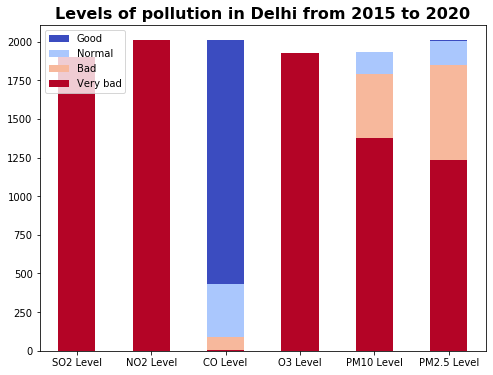

In [99]:
overview_Delhi = data_cleaned[data_cleaned.City=='Delhi'].groupby('Date').mean().loc[:,'SO2':'PM2.5']

# Adding levels 
for pol, func in evaluators.items():
    overview_Delhi[pol.split()[0] + ' Level'] = overview_Delhi[pol].map(func)
    
    
level_counts = pd.concat([overview_Delhi[col].value_counts() for col in overview_Delhi.loc[:, 'SO2 Level':]], axis=1, join='outer', sort=True).fillna(0.0)
level_counts = level_counts.loc[['Very bad', 'Bad', 'Normal', 'Good'], :]

level_counts.T.plot(kind='bar', stacked=True, figsize=(8,6), rot=0,
                    colormap='coolwarm_r', legend='reverse')
plt.title('Levels of pollution in Delhi from 2015 to 2020', fontsize=16, fontweight='bold')
plt.show()

In [101]:
general = overview_Delhi.describe().loc[['min', 'max', 'mean', 'std', '25%', '50%', '75%'],:].T
general['level'] = None
for idx, row in general.iterrows():
    general.loc[idx, 'level'] = evaluators[idx](row['mean'])
    
general.T

,SO2,NO2,CO,O3,PM10,PM2.5
min,2.34,10.63,0,6.94,18.59,10.24
max,71.56,162.5,30.44,257.73,796.88,685.36
mean,15.9013,50.7852,1.97605,51.3236,232.809,117.196
std,7.96677,22.6967,2.56025,26.0623,121.873,82.9129
25%,10.335,33.895,0.91,33.71,137.04,57.095
50%,14.45,47.15,1.24,44.44,216.73,94.62
75%,19.7,63.57,1.87,60.84,311.668,153.03
level,Very bad,Very bad,Good,Very bad,Very bad,Very bad


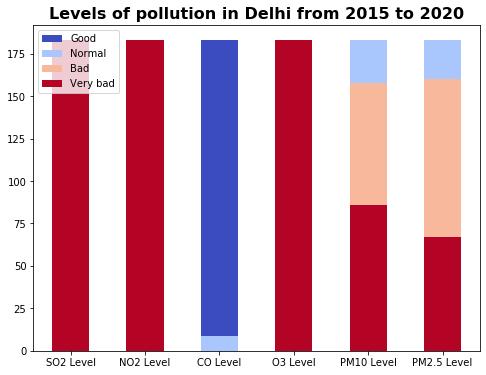

In [97]:
overview_Delhi_2020 = data_cleaned[(data_cleaned.City=='Delhi') & (data_cleaned.Year==2020)].groupby('Date').mean().loc[:,'SO2':'PM2.5']

# Adding levels 
for pol, func in evaluators.items():
    overview_Delhi_2020[pol.split()[0] + ' Level'] = overview_Delhi_2020[pol].map(func)
    
    
level_counts = pd.concat([overview_Delhi_2020[col].value_counts() for col in overview_Delhi_2020.loc[:, 'SO2 Level':]], axis=1, join='outer', sort=True).fillna(0.0)
level_counts = level_counts.loc[['Very bad', 'Bad', 'Normal', 'Good'], :]

level_counts.T.plot(kind='bar', stacked=True, figsize=(8,6), rot=0,
                    colormap='coolwarm_r', legend='reverse')
plt.title('Levels of pollution in Delhi in 2020', fontsize=16, fontweight='bold')
plt.show()

In [102]:
general = overview_Delhi_2020.describe().loc[['min', 'max', 'mean', 'std', '25%', '50%', '75%'],:].T
general['level'] = None
for idx, row in general.iterrows():
    general.loc[idx, 'level'] = evaluators[idx](row['mean'])
    
general.T

,SO2,NO2,CO,O3,PM10,PM2.5
min,7.28,14.36,0.52,17.63,34.15,21.23
max,26.05,67.09,3.32,76.32,483.87,372.14
mean,13.9124,33.2017,1.05776,40.6499,157.034,80.318
std,3.21065,13.8443,0.432289,11.8427,78.6337,55.9006
25%,11.565,21.295,0.82,32.43,96.255,41.005
50%,13.33,30.92,0.93,40.26,144.37,59.52
75%,15.86,44.275,1.175,48.475,198.07,102.735
level,Very bad,Very bad,Good,Very bad,Very bad,Very bad


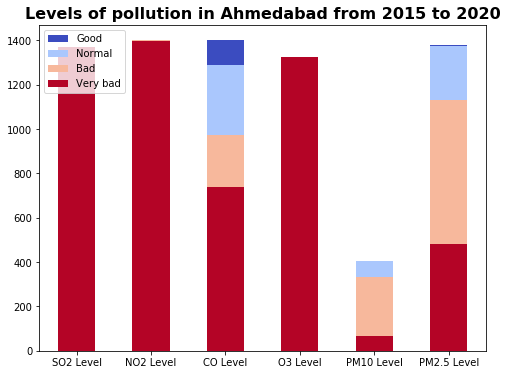

In [91]:
overview_Ahmedabad = data_cleaned[data_cleaned.City=='Ahmedabad'].groupby('Date').mean().loc[:,'SO2':'PM2.5']

# Adding levels 
for pol, func in evaluators.items():
    overview_Ahmedabad[pol.split()[0] + ' Level'] = overview_Ahmedabad[pol].map(func)
    
    
level_counts = pd.concat([overview_Ahmedabad[col].value_counts() for col in overview_Ahmedabad.loc[:, 'SO2 Level':]], axis=1, join='outer', sort=True).fillna(0.0)
level_counts = level_counts.loc[['Very bad', 'Bad', 'Normal', 'Good'], :]

level_counts.T.plot(kind='bar', stacked=True, figsize=(8,6), rot=0,
                    colormap='coolwarm_r', legend='reverse')
plt.title('Levels of pollution in Ahmedabad from 2015 to 2020', fontsize=16, fontweight='bold')
plt.show()

In [107]:
general = overview_Ahmedabad.describe().loc[['min', 'max', 'mean', 'std', '25%', '50%', '75%'],:].T
general['level'] = None
for idx, row in general.iterrows():
    general.loc[idx, 'level'] = evaluators[idx](row['mean'])
    
general.T

,SO2,NO2,CO,O3,PM10,PM2.5
min,0.52,0.08,0.06,0.38,11.5,3.04
max,186.08,292.02,175.81,162.43,586.27,381.69
mean,55.2537,59.0255,22.1934,39.1554,114.584,67.8545
std,39.7838,47.2834,21.6418,22.5837,45.7226,39.4914
25%,21.64,20.47,7.5075,22.5575,86.765,39.43
50%,46.78,47.19,16.245,39.51,107.96,58.37
75%,79.76,83.28,29.945,53.125,134.39,87.18
level,Very bad,Very bad,Very bad,Very bad,Bad,Bad


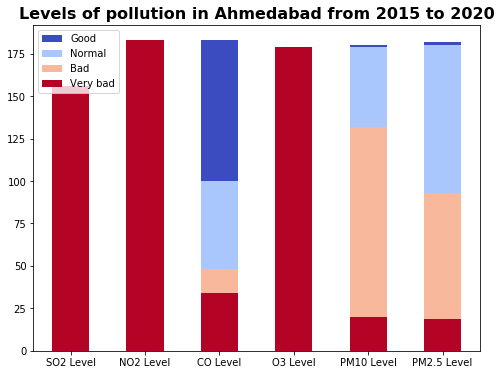

In [109]:
overview_Ahmedabad_2020 = data_cleaned[(data_cleaned.City=='Ahmedabad') & (data_cleaned.Year==2020)].groupby('Date').mean().loc[:,'SO2':'PM2.5']

# Adding levels 
for pol, func in evaluators.items():
    overview_Ahmedabad_2020[pol.split()[0] + ' Level'] = overview_Ahmedabad_2020[pol].map(func)
    
    
level_counts = pd.concat([overview_Ahmedabad_2020[col].value_counts() for col in overview_Ahmedabad_2020.loc[:, 'SO2 Level':]], axis=1, join='outer', sort=True).fillna(0.0)
level_counts = level_counts.loc[['Very bad', 'Bad', 'Normal', 'Good'], :]

level_counts.T.plot(kind='bar', stacked=True, figsize=(8,6), rot=0,
                    colormap='coolwarm_r', legend='reverse')
plt.title('Levels of pollution in Ahmedabad from 2015 to 2020', fontsize=16, fontweight='bold')
plt.show()

In [110]:
general = overview_Ahmedabad_2020.describe().loc[['min', 'max', 'mean', 'std', '25%', '50%', '75%'],:].T
general['level'] = None
for idx, row in general.iterrows():
    general.loc[idx, 'level'] = evaluators[idx](row['mean'])
    
general.T

,SO2,NO2,CO,O3,PM10,PM2.5
min,2.42,11.65,0.28,4.08,11.5,12.1
max,144.29,124.33,118,81.35,586.27,137.81
mean,37.553,31.0848,8.82317,43.6843,107.569,43.3427
std,24.2507,18.3701,15.8246,14.238,52.7683,22.6929
25%,19.905,17.9,0.575,34.665,79.1225,26.7225
50%,31.925,25.02,3.35,43.63,94.075,35.89
75%,49.58,37.965,9.675,53.925,125.362,56.1025
level,Very bad,Very bad,Normal,Very bad,Bad,Bad


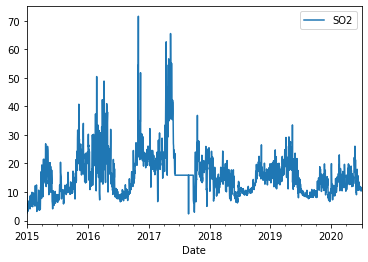

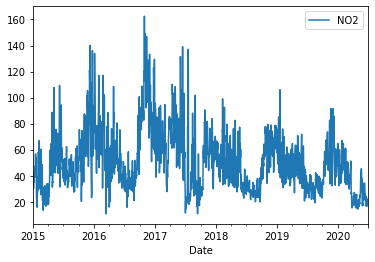

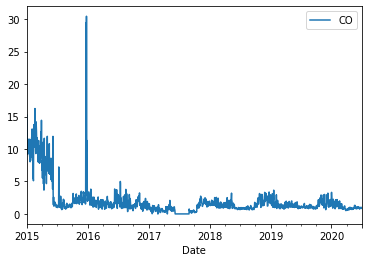

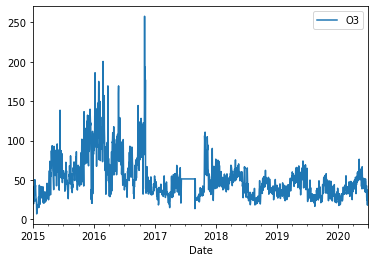

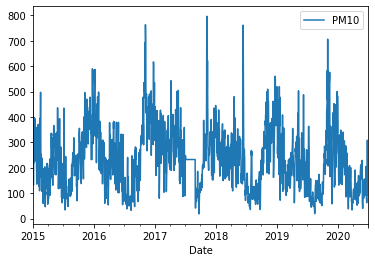

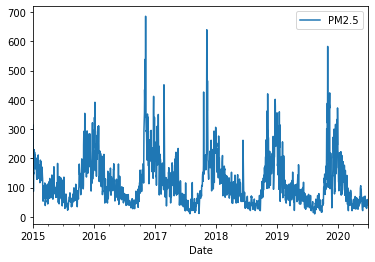

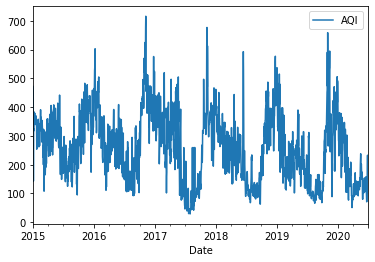

In [114]:
delhi_data = delhi_data.fillna(delhi_data.mean())

for i in ['SO2', 'NO2', 'CO', 'O3', 'PM10', 'PM2.5','AQI']:
    delhi_data.plot(x='Date',y=i)

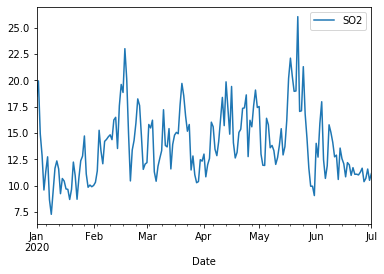

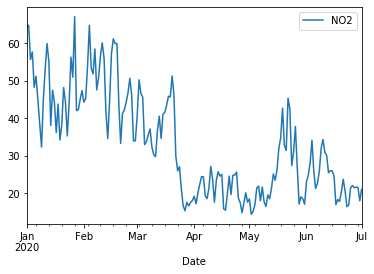

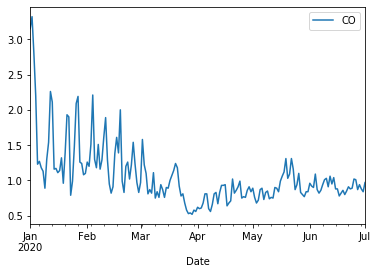

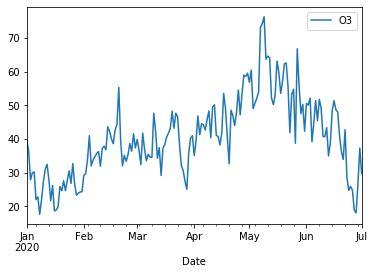

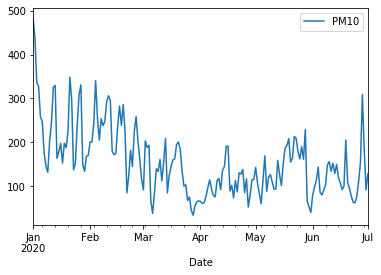

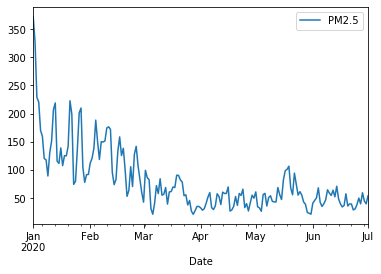

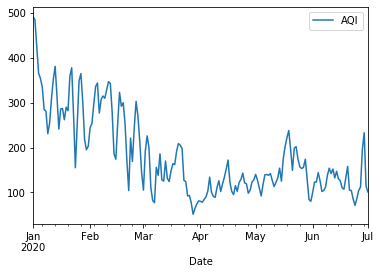

In [113]:
delhi_data_2020 = delhi_data[delhi_data['Year']==2020]

for i in ['SO2', 'NO2', 'CO', 'O3', 'PM10', 'PM2.5','AQI']:
    delhi_data_2020.plot(x='Date',y=i)

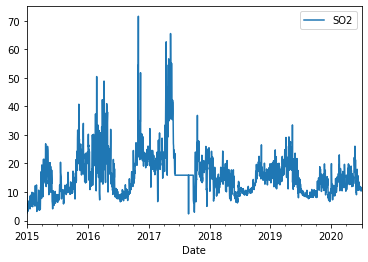

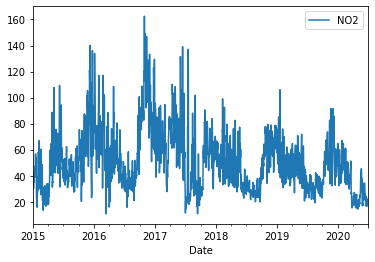

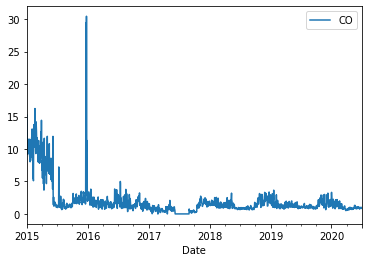

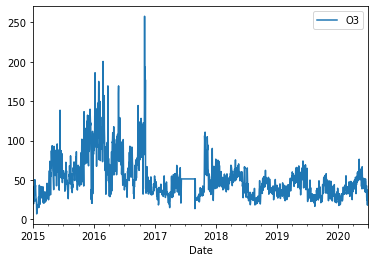

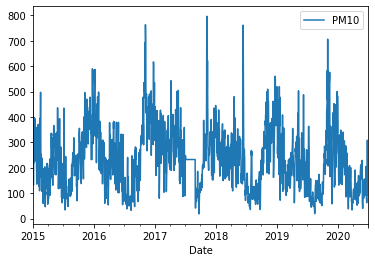

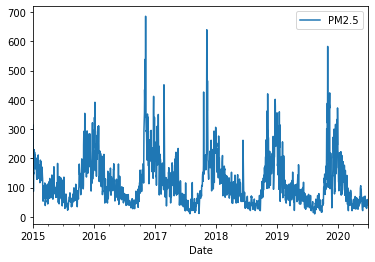

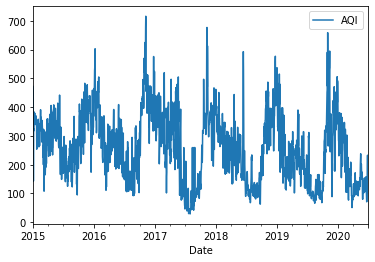

In [112]:
ahemdabad_data = ahemdabad_data.fillna(ahemdabad_data.mean())

for i in ['SO2', 'NO2', 'CO', 'O3', 'PM10', 'PM2.5','AQI']:
    delhi_data.plot(x='Date',y=i)

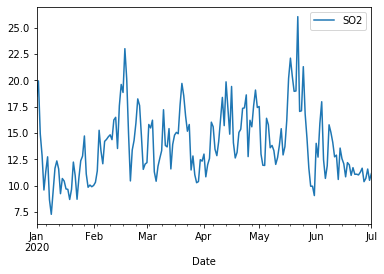

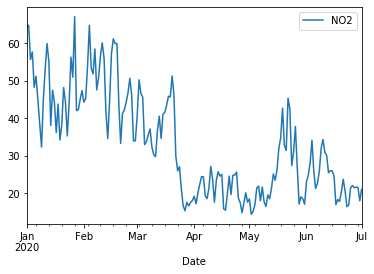

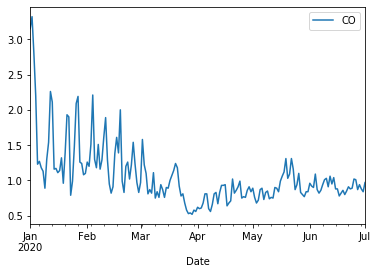

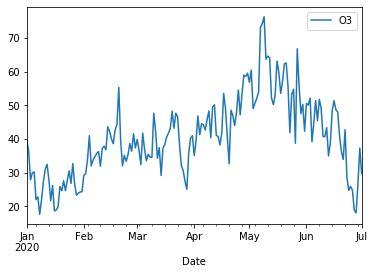

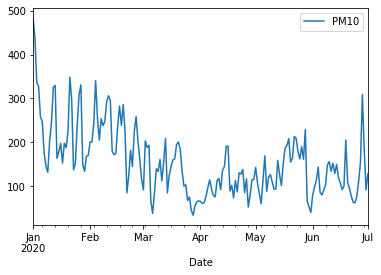

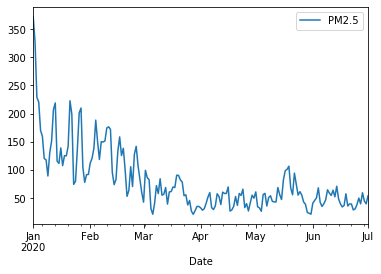

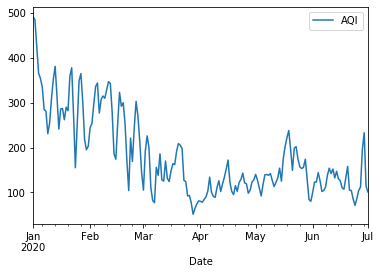

In [111]:
ahemdabad_data_2020 = ahemdabad_data[ahemdabad_data['Year']==2020]

for i in ['SO2', 'NO2', 'CO', 'O3', 'PM10', 'PM2.5','AQI']:
    delhi_data_2020.plot(x='Date',y=i)